# Order Delivery Time Prediction

## Objectives
The objective of this assignment is to build a regression model that predicts the delivery time for orders placed through Porter. The model will use various features such as the items ordered, the restaurant location, the order protocol, and the availability of delivery partners.

The key goals are:
- Predict the delivery time for an order based on multiple input features
- Improve delivery time predictions to optimiae operational efficiency
- Understand the key factors influencing delivery time to enhance the model's accuracy

## Data Pipeline
The data pipeline for this assignment will involve the following steps:
1. **Data Loading**
2. **Data Preprocessing and Feature Engineering**
3. **Exploratory Data Analysis**
4. **Model Building**
5. **Model Inference**

## Data Understanding
The dataset contains information on orders placed through Porter, with the following columns:

| Field                     | Description                                                                                 |
|---------------------------|---------------------------------------------------------------------------------------------|
| market_id                 | Integer ID representing the market where the restaurant is located.                         |
| created_at                | Timestamp when the order was placed.                                                        |
| actual_delivery_time      | Timestamp when the order was delivered.                                                     |
| store_primary_category    | Category of the restaurant (e.g., fast food, dine-in).                                      |
| order_protocol            | Integer representing how the order was placed (e.g., via Porter, call to restaurant, etc.). |
| total_items               | Total number of items in the order.                                                         |
| subtotal                  | Final price of the order.                                                                   |
| num_distinct_items        | Number of distinct items in the order.                                                      |
| min_item_price            | Price of the cheapest item in the order.                                                    |
| max_item_price            | Price of the most expensive item in the order.                                              |
| total_onshift_dashers     | Number of delivery partners on duty when the order was placed.                              |
| total_busy_dashers        | Number of delivery partners already occupied with other orders.                             |
| total_outstanding_orders  | Number of orders pending fulfillment at the time of the order.                              |
| distance                  | Total distance from the restaurant to the customer.                                         |


## **Importing Necessary Libraries**

In [2]:
# Import essential libraries for data manipulation and analysisim
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns



In [3]:
import warnings
warnings.filterwarnings("ignore")

## **1. Loading the data**
Load 'porter_data_1.csv' as a DataFrame

In [5]:
# Importing the file porter_data_1.csv
df = pd.read_csv('porter_data_1.csv')
df.head()

market_id           created_at actual_delivery_time  \
0        1.0  2015-02-06 22:24:17  2015-02-06 23:11:17   
1        2.0  2015-02-10 21:49:25  2015-02-10 22:33:25   
2        2.0  2015-02-16 00:11:35  2015-02-16 01:06:35   
3        1.0  2015-02-12 03:36:46  2015-02-12 04:35:46   
4        1.0  2015-01-27 02:12:36  2015-01-27 02:58:36   

   store_primary_category  order_protocol  total_items  subtotal  \
0                       4             1.0            4      3441   
1                      46             2.0            1      1900   
2                      36             3.0            4      4771   
3                      38             1.0            1      1525   
4                      38             1.0            2      3620   

   num_distinct_items  min_item_price  max_item_price  total_onshift_dashers  \
0                   4             557            1239                   33.0   
1                   1            1400            1400                    1.0   
2                   3             820            1604                    8.0   
3                   1            1525            1525                    5.0   
4                   2            1425            2195                    5.0   

   total_busy_dashers  total_outstanding_orders  distance  
0                14.0                      21.0     34.44  
1                 2.0                       2.0     27.60  
2                 6.0                      18.0     11.56  
3                 6.0                       8.0     31.80  
4                 5.0                       7.0      8.20

In [6]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 175777 non-null  float64
 1   created_at                175777 non-null  object 
 2   actual_delivery_time      175777 non-null  object 
 3   store_primary_category    175777 non-null  int64  
 4   order_protocol            175777 non-null  float64
 5   total_items               175777 non-null  int64  
 6   subtotal                  175777 non-null  int64  
 7   num_distinct_items        175777 non-null  int64  
 8   min_item_price            175777 non-null  int64  
 9   max_item_price            175777 non-null  int64  
 10  total_onshift_dashers     175777 non-null  float64
 11  total_busy_dashers        175777 non-null  float64
 12  total_outstanding_orders  175777 non-null  float64
 13  distance                  175777 non-null  f

## **2. Data Preprocessing and Feature Engineering** <font color = red>[15 marks]</font> <br>

#### **2.1 Fixing the Datatypes**  <font color = red>[5 marks]</font> <br>
The current timestamps are in object format and need conversion to datetime format for easier handling and intended functionality

##### **2.1.1** <font color = red>[2 marks]</font> <br>
Convert date and time fields to appropriate data type

In [10]:
# Convert 'created_at' and 'actual_delivery_time' columns to datetime format
df['created_at'] = pd.to_datetime(df['created_at'])
df['actual_delivery_time'] = pd.to_datetime(df['actual_delivery_time'])

df.dtypes[['created_at', 'actual_delivery_time']]


created_at              datetime64[ns]
actual_delivery_time    datetime64[ns]
dtype: object

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   market_id                 175777 non-null  float64       
 1   created_at                175777 non-null  datetime64[ns]
 2   actual_delivery_time      175777 non-null  datetime64[ns]
 3   store_primary_category    175777 non-null  int64         
 4   order_protocol            175777 non-null  float64       
 5   total_items               175777 non-null  int64         
 6   subtotal                  175777 non-null  int64         
 7   num_distinct_items        175777 non-null  int64         
 8   min_item_price            175777 non-null  int64         
 9   max_item_price            175777 non-null  int64         
 10  total_onshift_dashers     175777 non-null  float64       
 11  total_busy_dashers        175777 non-null  float64       
 12  to

##### **2.1.2**  <font color = red>[3 marks]</font> <br>
Convert categorical fields to appropriate data type

In [15]:
# Convert categorical features to category type
category_columns = ['store_primary_category', 'order_protocol']
df[category_columns] = df[category_columns].apply(lambda col: col.astype('category'))
print(df.dtypes)

market_id                          float64
created_at                  datetime64[ns]
actual_delivery_time        datetime64[ns]
store_primary_category            category
order_protocol                    category
total_items                          int64
subtotal                             int64
num_distinct_items                   int64
min_item_price                       int64
max_item_price                       int64
total_onshift_dashers              float64
total_busy_dashers                 float64
total_outstanding_orders           float64
distance                           float64
dtype: object


#### **2.2 Feature Engineering** <font color = red>[5 marks]</font> <br>
Calculate the time taken to execute the delivery as well as extract the hour and day at which the order was placed

##### **2.2.1** <font color = red>[2 marks]</font> <br>
Calculate the time taken using the features `actual_delivery_time` and `created_at`

In [20]:
# Calculate time taken in minutes
df['time_taken'] = (df['actual_delivery_time'] - df['created_at']).dt.total_seconds() / 60

##### **2.2.2** <font color = red>[3 marks]</font> <br>
Extract the hour at which the order was placed and which day of the week it was. Drop the unnecessary columns.

In [22]:
# Extract the hour and day of week from the 'created_at' timestamp
df['order_hour'] = df['created_at'].dt.hour
df['order_dayofweek'] = df['created_at'].dt.dayofweek 

# Create a categorical feature 'isWeekend'
df['isWeekend'] = df['order_dayofweek'].apply(lambda x: 1 if x >= 5 else 0)



In [25]:
# Drop unnecessary columns
df = df.drop(columns=['market_id', 'created_at', 'actual_delivery_time'])
df.columns

Index(['store_primary_category', 'order_protocol', 'total_items', 'subtotal',
       'num_distinct_items', 'min_item_price', 'max_item_price',
       'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders', 'distance', 'time_taken', 'order_hour',
       'order_dayofweek', 'isWeekend'],
      dtype='object')

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   store_primary_category    175777 non-null  category
 1   order_protocol            175777 non-null  category
 2   total_items               175777 non-null  int64   
 3   subtotal                  175777 non-null  int64   
 4   num_distinct_items        175777 non-null  int64   
 5   min_item_price            175777 non-null  int64   
 6   max_item_price            175777 non-null  int64   
 7   total_onshift_dashers     175777 non-null  float64 
 8   total_busy_dashers        175777 non-null  float64 
 9   total_outstanding_orders  175777 non-null  float64 
 10  distance                  175777 non-null  float64 
 11  time_taken                175777 non-null  float64 
 12  order_hour                175777 non-null  int32   
 13  order_dayofweek           175

#### **2.3 Creating training and validation sets** <font color = red>[5 marks]</font> <br>

##### **2.3.1** <font color = red>[2 marks]</font> <br>
 Define target and input features

In [30]:
# Define target variable (y) and features (X)
y = df['time_taken']
X = df.drop(columns=['time_taken'])

print(y.info())
print(X.info())

<class 'pandas.core.series.Series'>
RangeIndex: 175777 entries, 0 to 175776
Series name: time_taken
Non-Null Count   Dtype  
--------------   -----  
175777 non-null  float64
dtypes: float64(1)
memory usage: 1.3 MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   store_primary_category    175777 non-null  category
 1   order_protocol            175777 non-null  category
 2   total_items               175777 non-null  int64   
 3   subtotal                  175777 non-null  int64   
 4   num_distinct_items        175777 non-null  int64   
 5   min_item_price            175777 non-null  int64   
 6   max_item_price            175777 non-null  int64   
 7   total_onshift_dashers     175777 non-null  float64 
 8   total_busy_dashers        175777 non-null  float64 
 9   total_outstanding_orders  175777 non-

##### **2.3.2** <font color = red>[3 marks]</font> <br>
 Split the data into training and test sets

In [33]:
# Split data into training and testing sets
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size=0.8, test_size=0.2, random_state=100)



## **3. Exploratory Data Analysis on Training Data** <font color = red>[20 marks]</font> <br>
1. Analyzing the correlation between variables to identify patterns and relationships
2. Identifying and addressing outliers to ensure the integrity of the analysis
3. Exploring the relationships between variables and examining the distribution of the data for better insights

#### **3.1 Feature Distributions** <font color = red> [7 marks]</font> <br>


In [39]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140621 entries, 42111 to 38408
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   store_primary_category    140621 non-null  category
 1   order_protocol            140621 non-null  category
 2   total_items               140621 non-null  int64   
 3   subtotal                  140621 non-null  int64   
 4   num_distinct_items        140621 non-null  int64   
 5   min_item_price            140621 non-null  int64   
 6   max_item_price            140621 non-null  int64   
 7   total_onshift_dashers     140621 non-null  float64 
 8   total_busy_dashers        140621 non-null  float64 
 9   total_outstanding_orders  140621 non-null  float64 
 10  distance                  140621 non-null  float64 
 11  time_taken                140621 non-null  float64 
 12  order_hour                140621 non-null  int32   
 13  order_dayofweek           14062

In [41]:
# Define numerical and categorical columns for easy EDA and data manipulation
numerical_cols =['total_items','subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price' , 
                     'total_onshift_dashers' , 'total_busy_dashers' , 'total_outstanding_orders' , 'distance']
categorical_cols = ['store_primary_category','order_protocol','order_hour', 'order_dayofweek' , 'isWeekend']


##### **3.1.1** <font color = red>[3 marks]</font> <br>
Plot distributions for numerical columns in the training set to understand their spread and any skewness

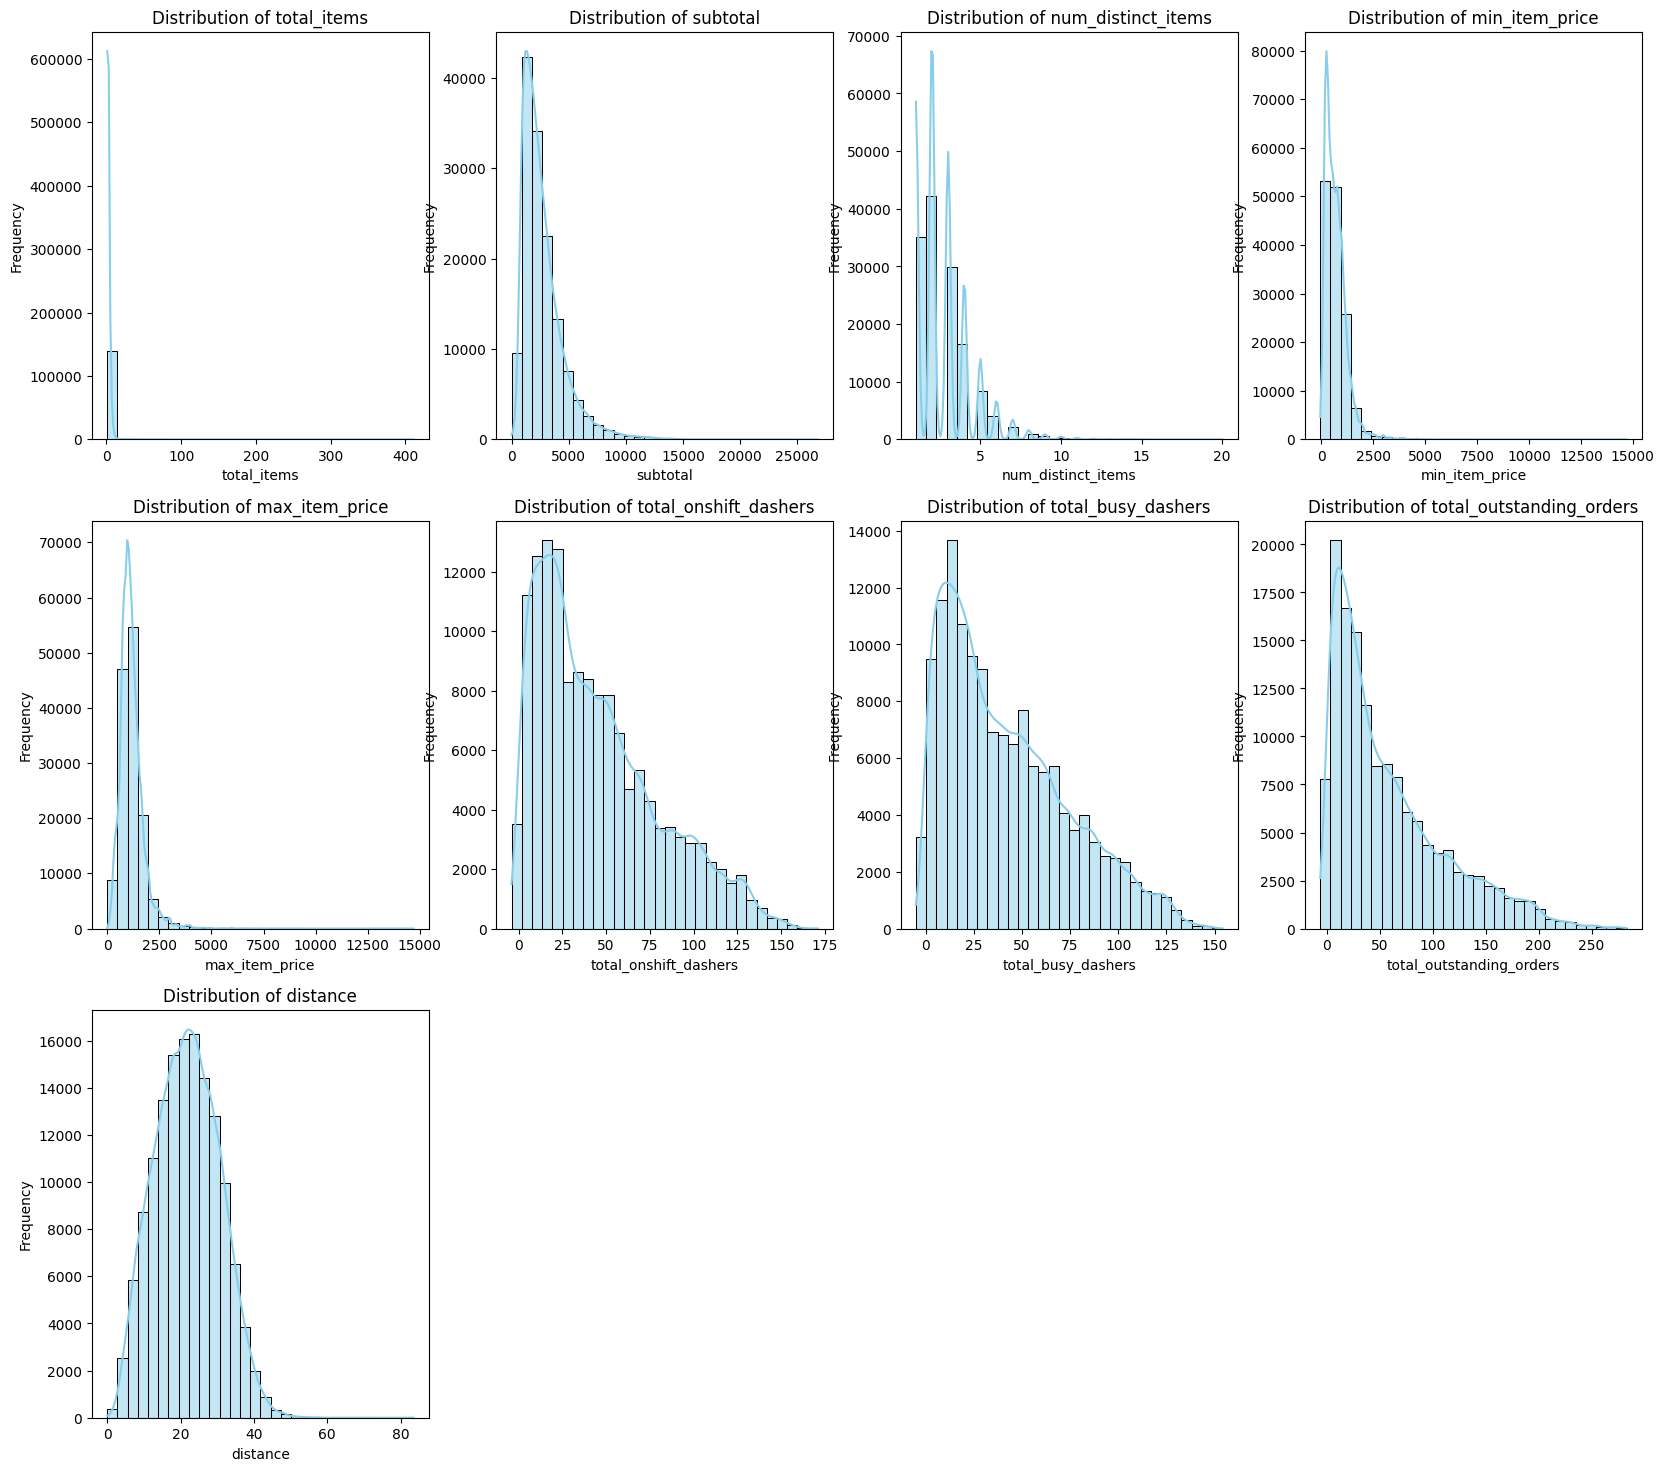

In [43]:
# Plot distributions for all numerical columns
plt.figure(figsize=(20, 18))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 4, i)
    sns.histplot(df_train[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.show()


##### **3.1.2** <font color = red>[2 marks]</font> <br>
Check the distribution of categorical features

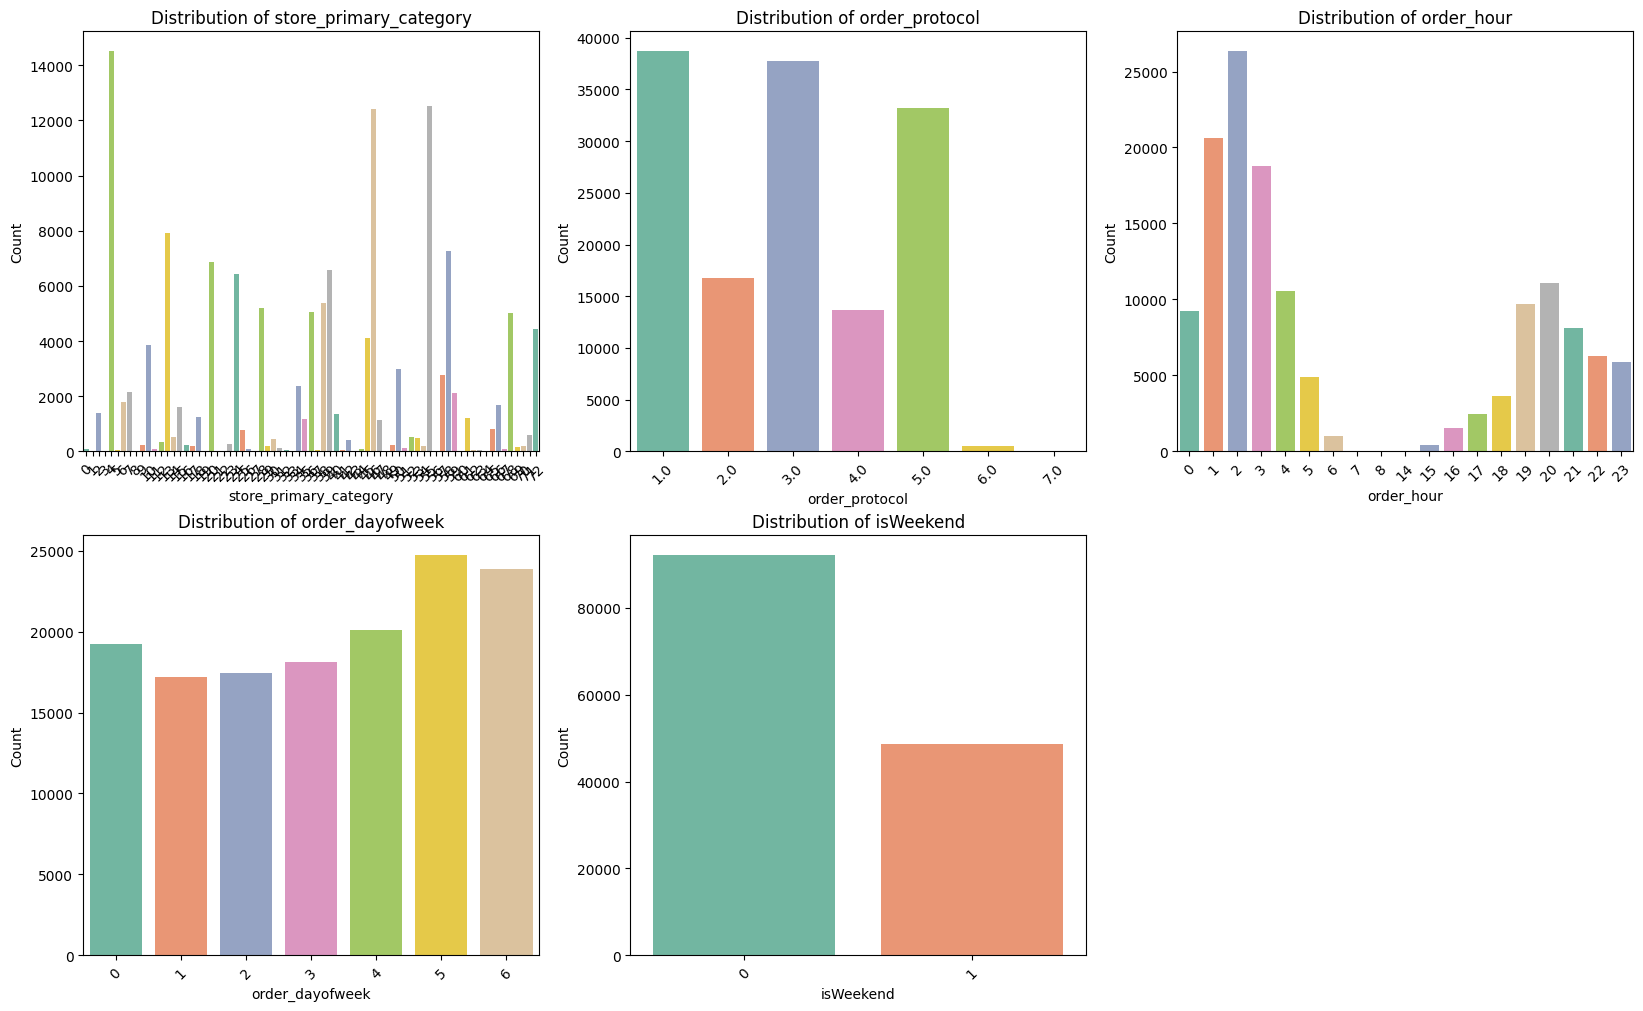

In [46]:
# Distribution of categorical columns
plt.figure(figsize=(20, 12))

for i, col in enumerate(categorical_cols, 1):
    plt.subplot(2, 3, i)
    sns.countplot(data=df_train, x=col, palette='Set2')
    plt.title(f'Distribution of {col}', fontsize=12)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)

plt.show()

##### **3.1.3** <font color = red>[2 mark]</font> <br>
Visualise the distribution of the target variable to understand its spread and any skewness

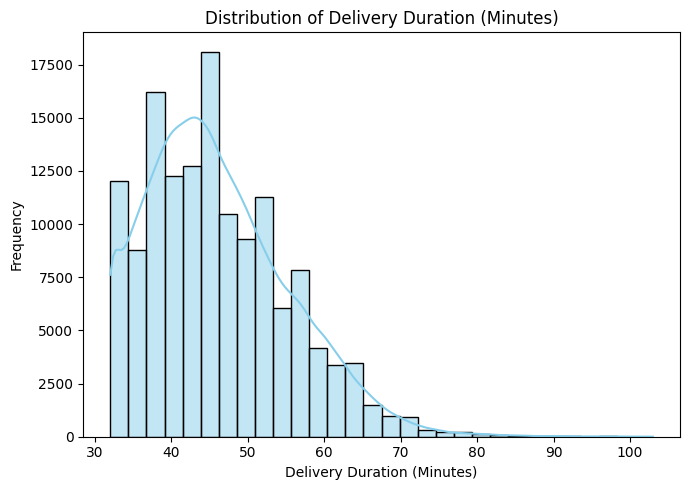

In [50]:
# Distribution of time_taken
plt.figure(figsize=(7, 5))
sns.histplot(df_train['time_taken'], kde=True, bins=30, color='skyblue')
plt.title("Distribution of Delivery Duration (Minutes)")
plt.xlabel("Delivery Duration (Minutes)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


#### **3.2 Relationships Between Features** <font color = red>[3 marks]</font> <br>

##### **3.2.1** <font color = red>[3 marks]</font> <br>
Scatter plots for important numerical and categorical features to observe how they relate to `time_taken`

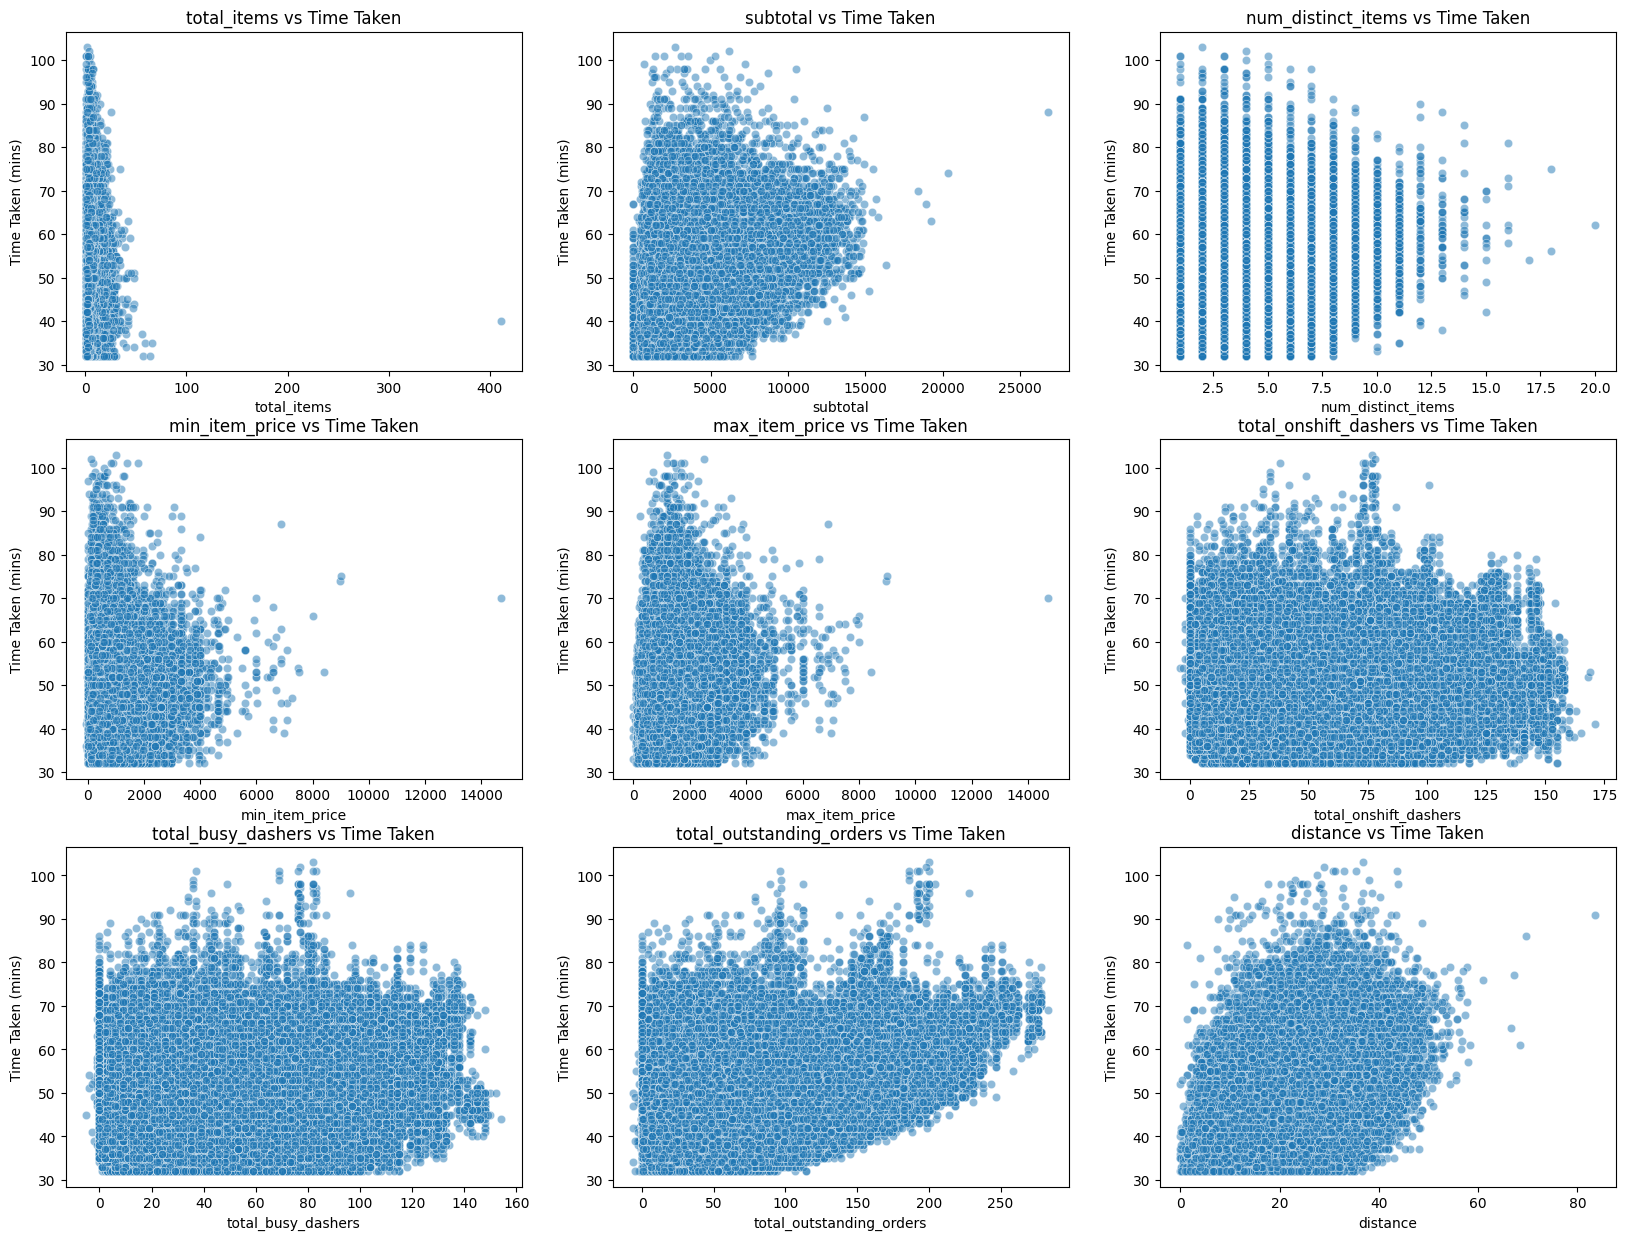

In [53]:
# Scatter plot to visualise the relationship between time_taken and other features
plt.figure(figsize=(20, 15))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.scatterplot(x=df_train[col], y=df_train['time_taken'], alpha=0.5)
    plt.title(f'{col} vs Time Taken')
    plt.xlabel(col)
    plt.ylabel('Time Taken (mins)')

plt.show()


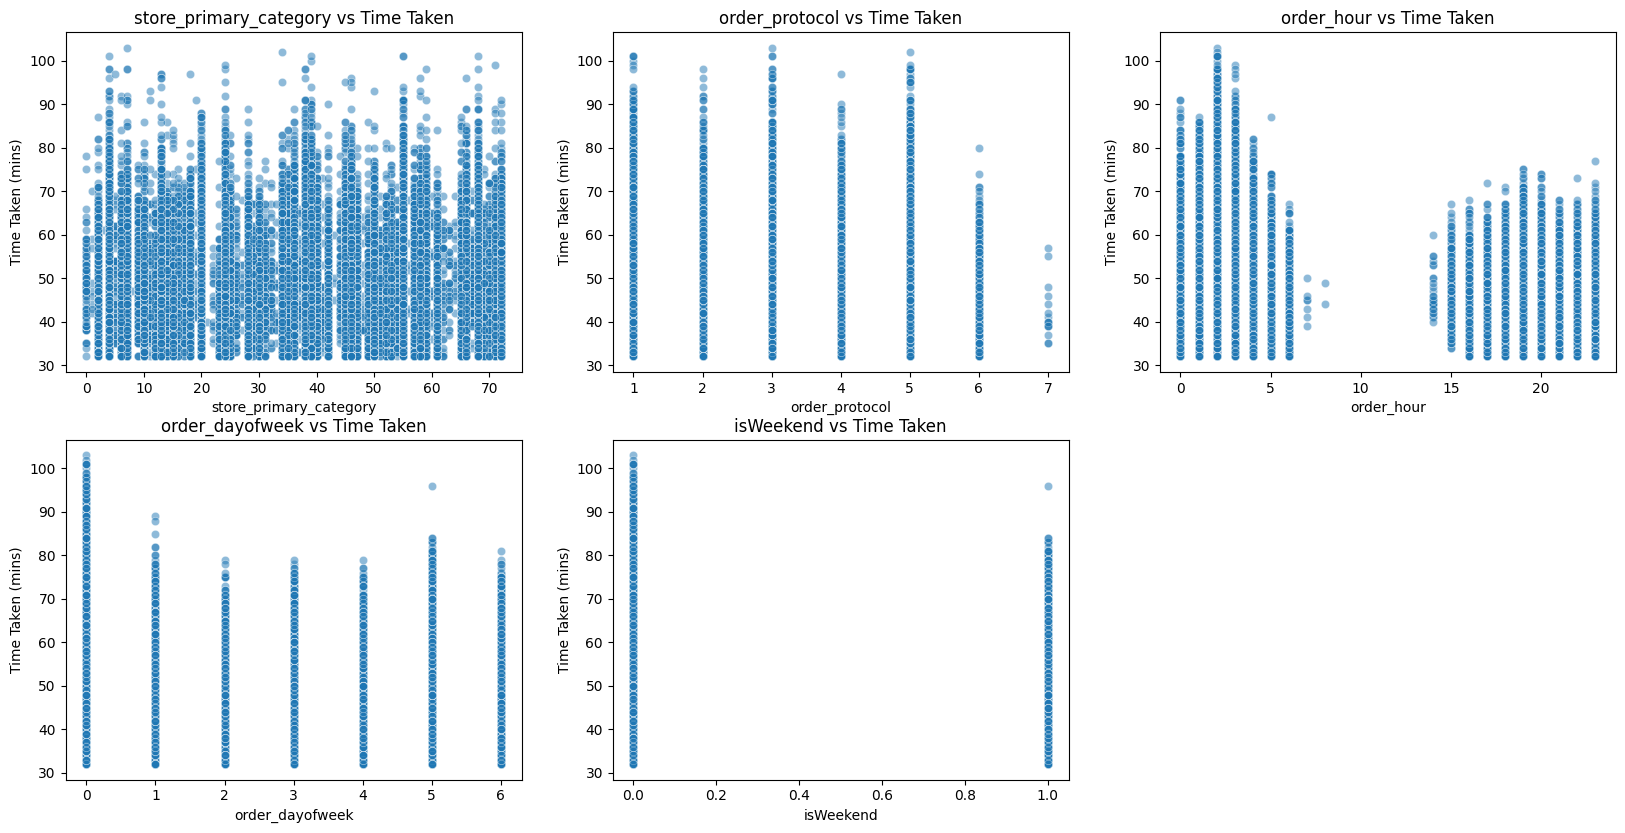

In [54]:
plt.figure(figsize=(20, 15))

for i, col in enumerate(categorical_cols, 1):
    plt.subplot(3, 3, i)
    sns.scatterplot(x=df_train[col], y=df_train['time_taken'], alpha=0.5)
    plt.title(f'{col} vs Time Taken')
    plt.xlabel(col)
    plt.ylabel('Time Taken (mins)')

plt.show()

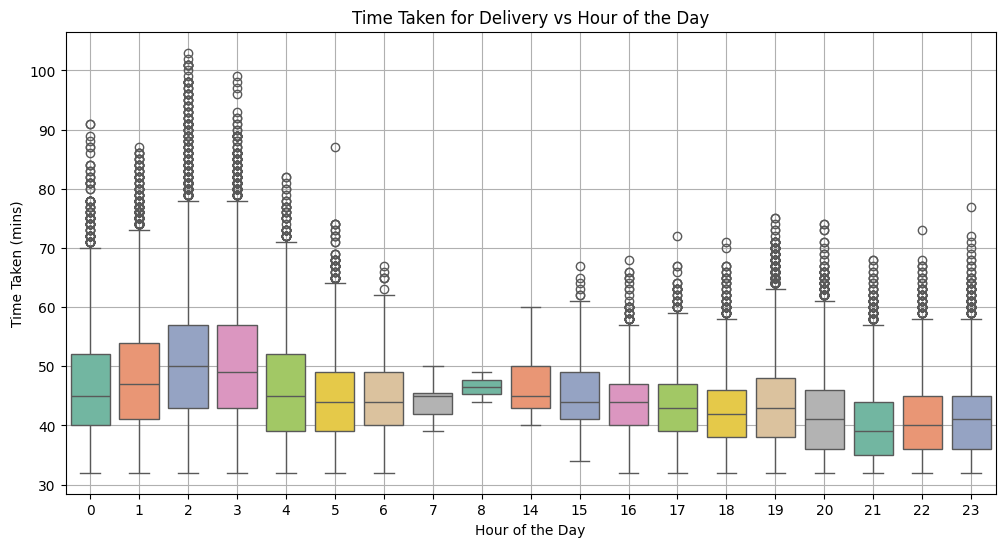

In [55]:
# Show the distribution of time_taken for different hours
plt.figure(figsize=(12, 6))
sns.boxplot(x='order_hour', y='time_taken', data=df_train, palette="Set2")
plt.title('Time Taken for Delivery vs Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Time Taken (mins)')
plt.grid(True)
plt.show()


#### **3.3 Correlation Analysis** <font color = red>[5 marks]</font> <br>
Check correlations between numerical features to identify which variables are strongly related to `time_taken`

##### **3.3.1** <font color = red>[3 marks]</font> <br>
Plot a heatmap to display correlations

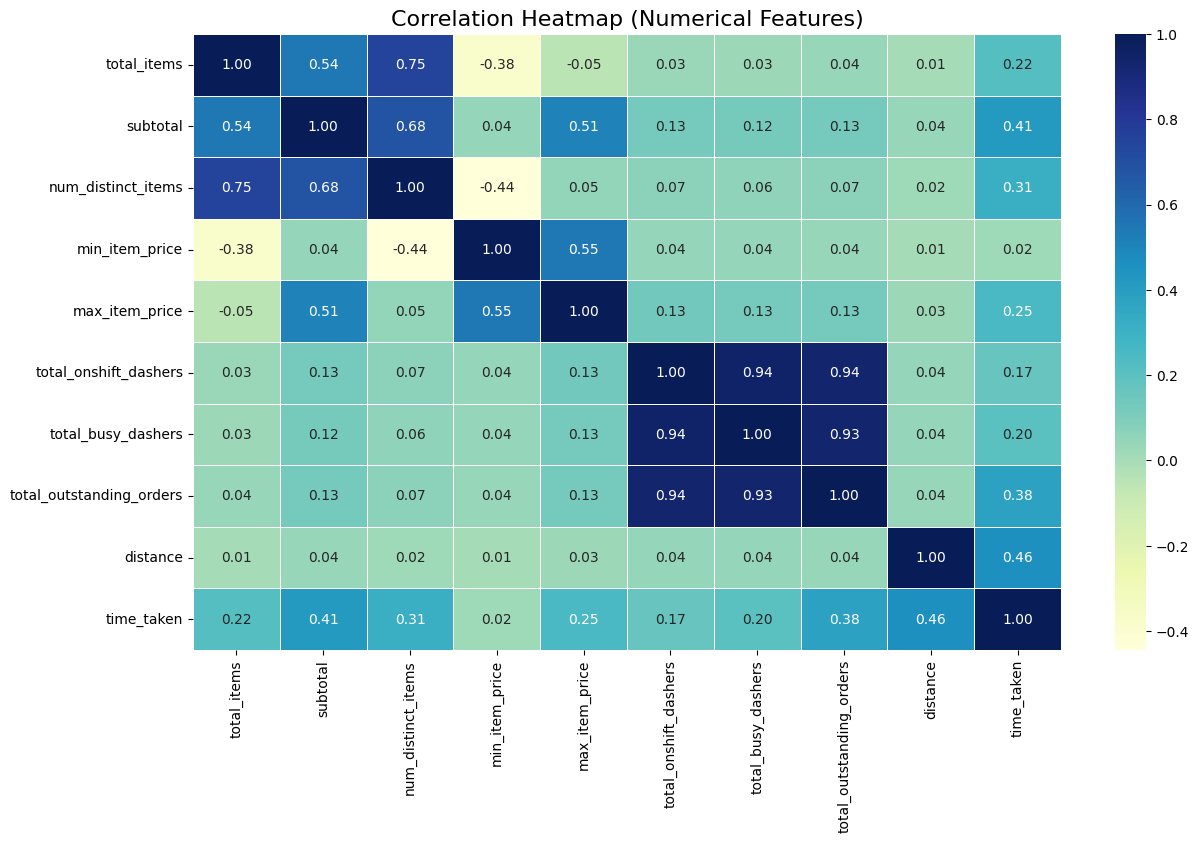

In [58]:
# Plot the heatmap of the correlation matrix
correlation_cols = numerical_cols + ['time_taken']
corr_matrix = df_train[correlation_cols].corr()

plt.figure(figsize=(14, 8))
sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap (Numerical Features)", fontsize=16)
plt.show()

##### **3.3.2** <font color = red>[2 marks]</font> <br>
Drop the columns with weak correlations with the target variable

In [60]:
# Drop 3-5 weakly correlated columns from training dataset
df_train = df_train.drop(columns = ['store_primary_category', 'min_item_price', 'order_dayofweek','total_onshift_dashers'])


#### **3.4 Handling the Outliers** <font color = red>[5 marks]</font> <br>



##### **3.4.1** <font color = red>[2 marks]</font> <br>
Visualise potential outliers for the target variable and other numerical features using boxplots

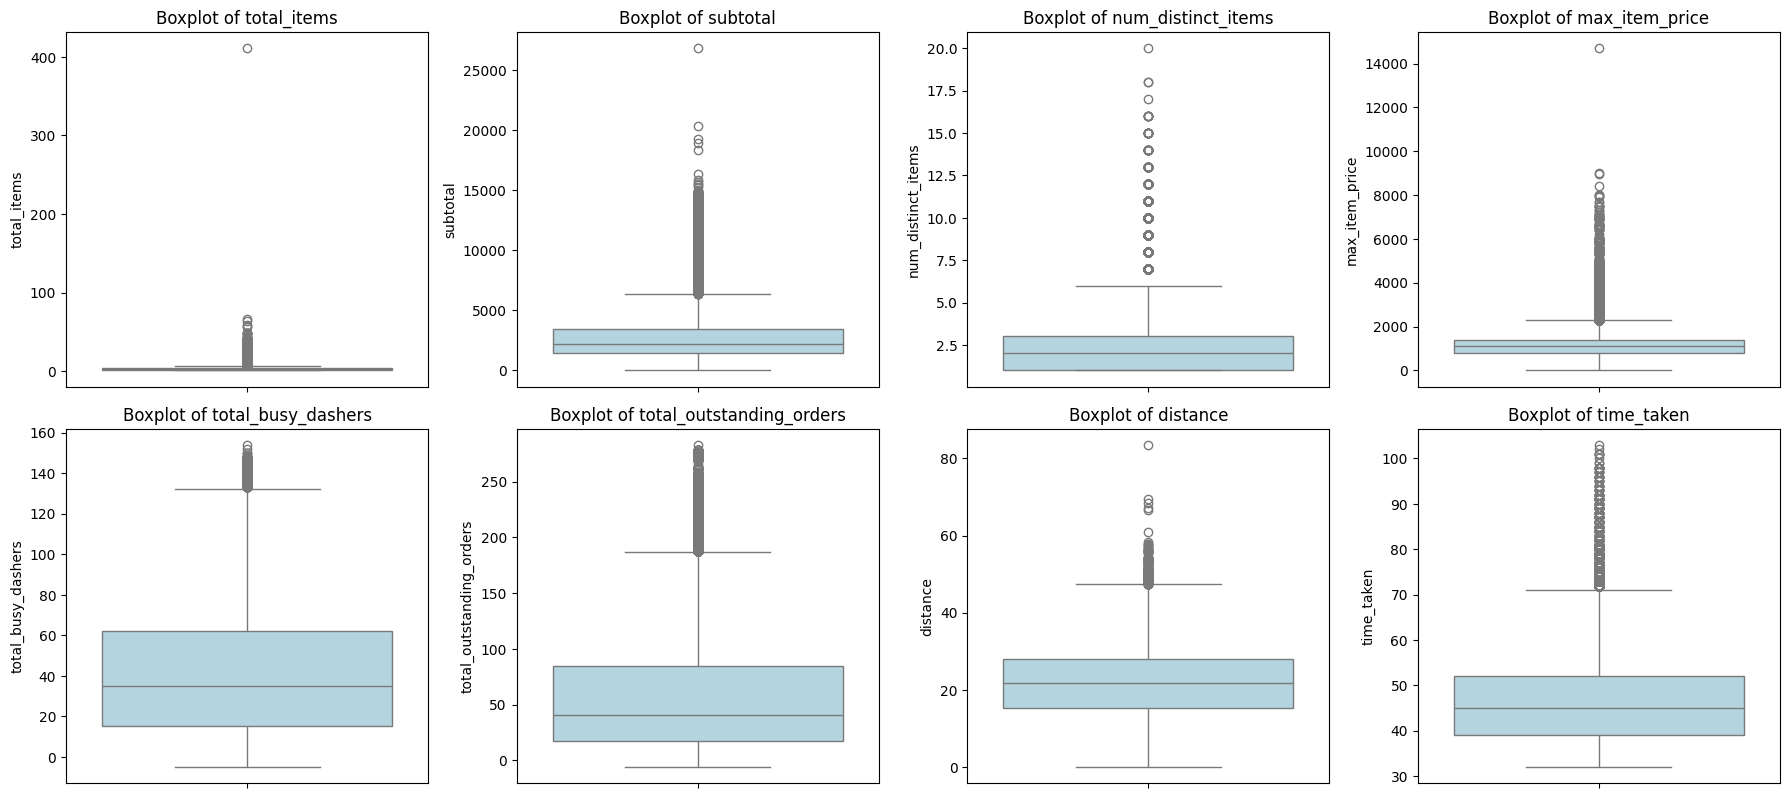

In [63]:
# Boxplot for time_taken
numerical_cols = [col for col in numerical_cols if col in df_train.columns]

plt.figure(figsize=(18, 12))

for i, col in enumerate(numerical_cols + ['time_taken'], 1):
    plt.subplot(3, 4, i)
    sns.boxplot(y=df_train[col], color='lightblue')
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()


##### **3.4.2** <font color = red>[3 marks]</font> <br>
Handle outliers present in all columns

In [65]:
# Handle outliers
numerical_cols_new = [col for col in numerical_cols if col in df_train.columns]
for col in numerical_cols_new:
    if col in df_train.columns:
        Q1 = df_train[col].quantile(0.25)
        Q3 = df_train[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        df_train[col] = df_train[col].clip(lower=lower_bound, upper=upper_bound)

## **4. Exploratory Data Analysis on Validation Data** <font color = red>[optional]</font> <br>
Optionally, perform EDA on test data to see if the distribution match with the training data

In [69]:
# Define numerical and categorical columns for easy EDA and data manipulation
numerical_cols_test = ['total_items','subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price' ,
                           'total_onshift_dashers' , 'total_busy_dashers' , 'total_outstanding_orders' , 'distance']

categorical_cols_test = ['store_primary_category','order_protocol','order_hour', 'order_dayofweek' , 'isWeekend']


#### **4.1 Feature Distributions**


##### **4.1.1**
Plot distributions for numerical columns in the validation set to understand their spread and any skewness

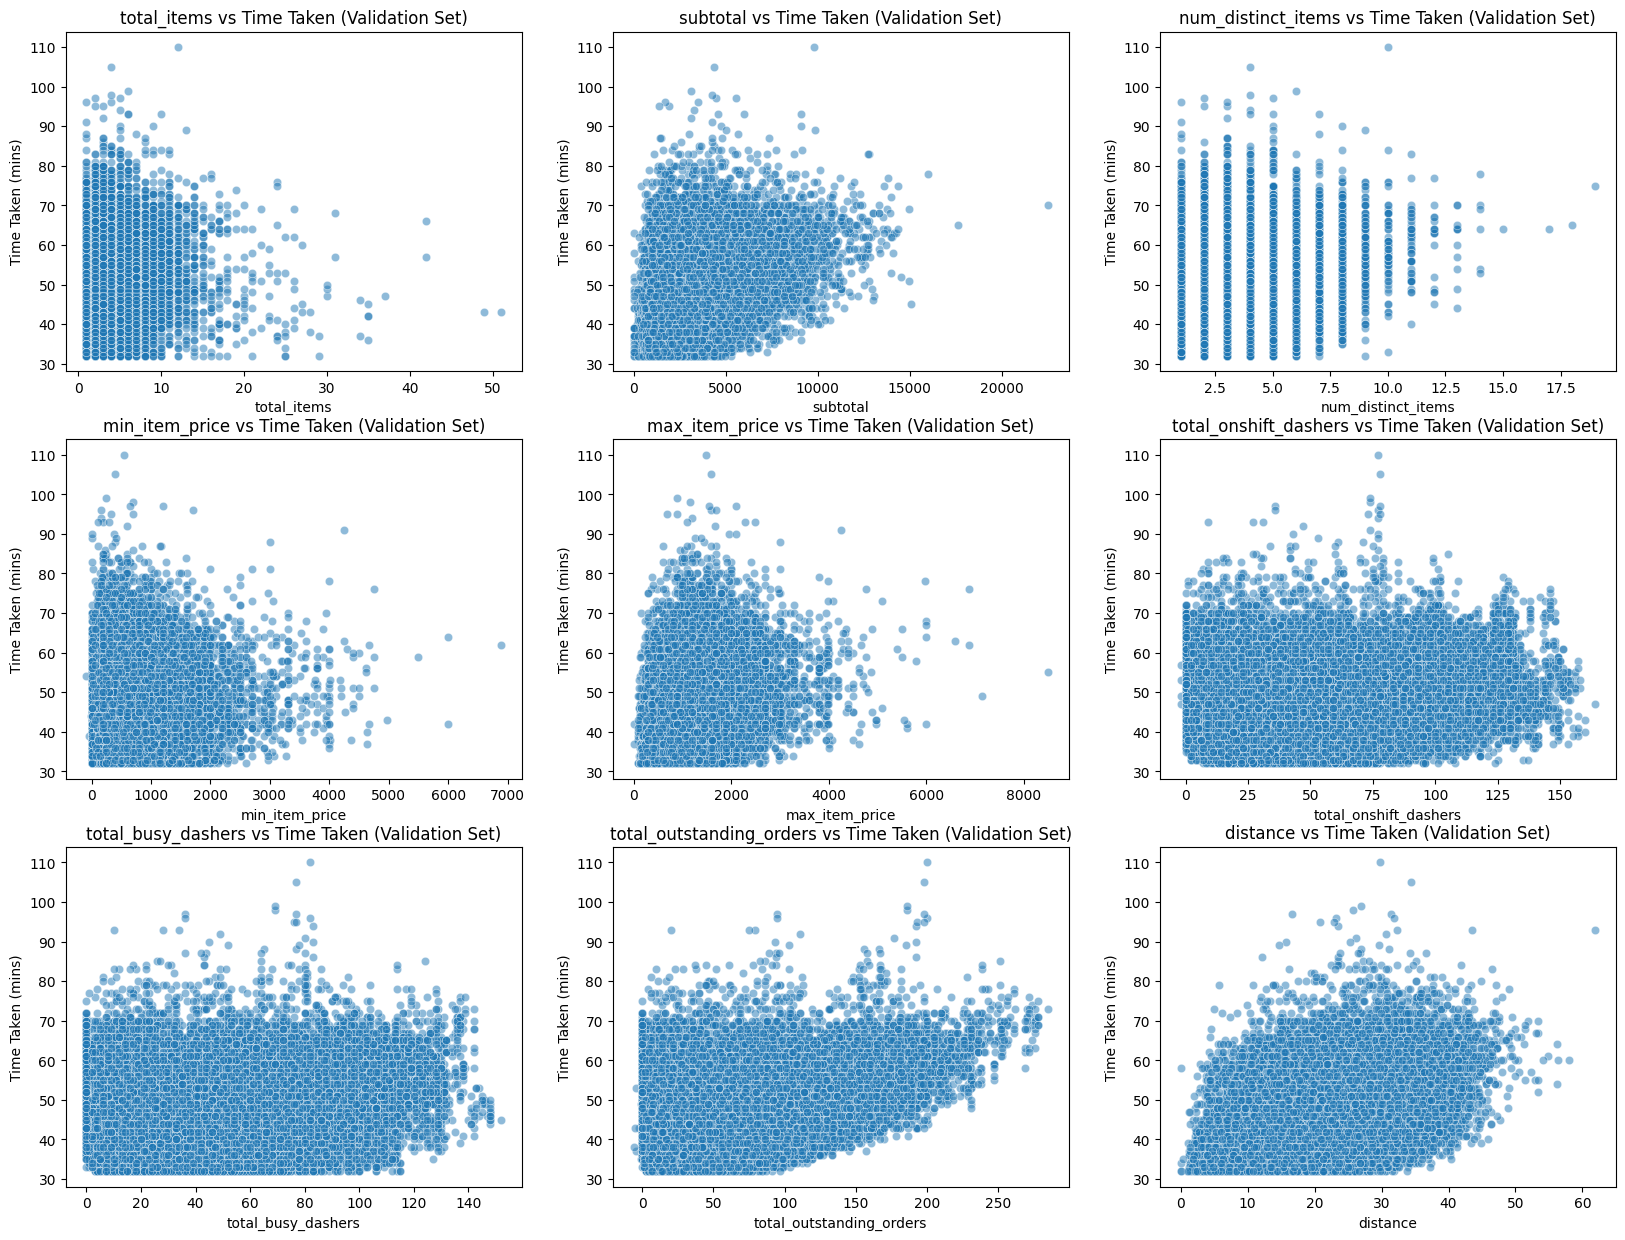

In [72]:
# Plot distributions for all numerical columns
plt.figure(figsize=(20, 15))

for i, col in enumerate(numerical_cols_test, 1):
    plt.subplot(3, 3, i)
    sns.scatterplot(x=df_test[col], y=df_test['time_taken'], alpha=0.5)
    plt.title(f'{col} vs Time Taken (Validation Set)')
    plt.xlabel(col)
    plt.ylabel('Time Taken (mins)')


plt.show()


##### **4.1.2**
Check the distribution of categorical features

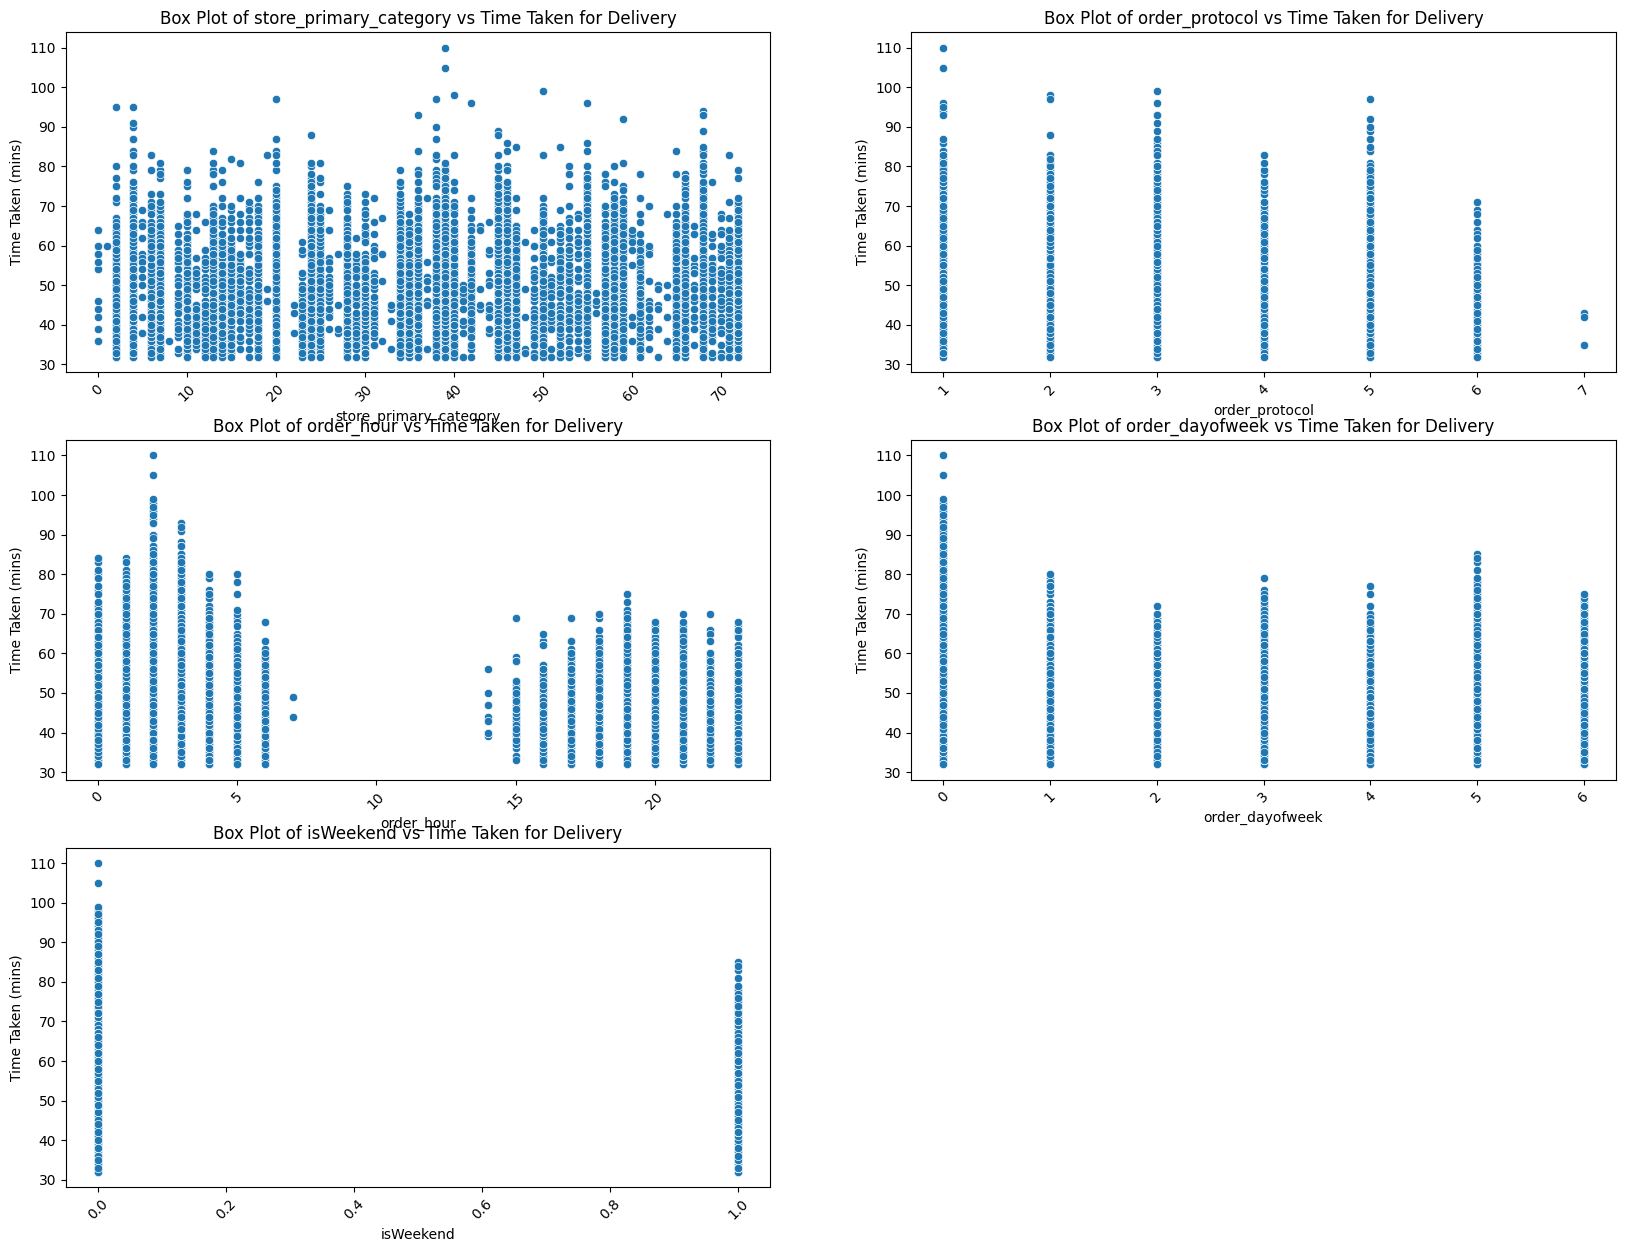

In [75]:
# Distribution of categorical columns
plt.figure(figsize=(20, 15))

for i, col in enumerate(categorical_cols_test, 1):
    plt.subplot(3, 2, i)
    sns.scatterplot(x=col, y='time_taken', data=df_test, palette="Set3")
    plt.title(f'Box Plot of {col} vs Time Taken for Delivery')
    plt.xlabel(col)
    plt.ylabel('Time Taken (mins)')
    plt.xticks(rotation=45)

plt.show()


##### **4.1.3**
Visualise the distribution of the target variable to understand its spread and any skewness

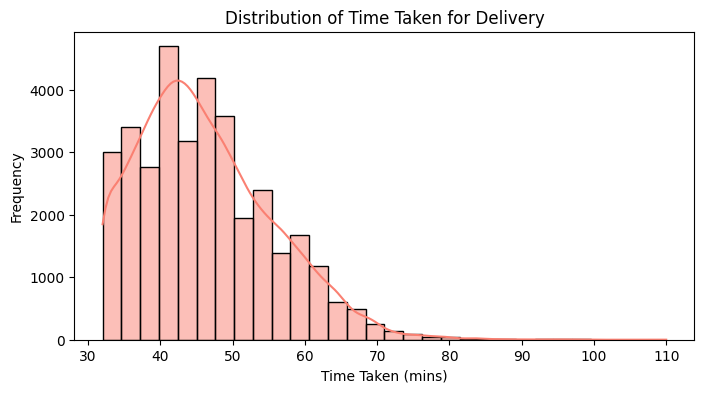

In [77]:
# Distribution of time_taken
plt.figure(figsize=(8, 4))
sns.histplot(df_test['time_taken'], kde=True, bins=30, color='salmon')
plt.title('Distribution of Time Taken for Delivery')
plt.xlabel('Time Taken (mins)')
plt.ylabel('Frequency')
plt.show()

#### **4.2 Relationships Between Features**
Scatter plots for numerical features to observe how they relate to each other, especially to `time_taken`

In [79]:
# Scatter plot to visualise the relationship between time_taken and other features



#### **4.3** Drop the columns with weak correlations with the target variable

In [83]:
# Drop the weakly correlated columns from training dataset


## **5. Model Building** <font color = red>[15 marks]</font> <br>

#### **Import Necessary Libraries**

In [69]:
# Import libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


#### **5.1 Feature Scaling** <font color = red>[3 marks]</font> <br>

In [71]:
# Apply scaling to the numerical columns
from sklearn.preprocessing import StandardScaler
numerical_cols = ['total_items', 'subtotal', 'num_distinct_items', 
                  'max_item_price', 'total_busy_dashers', 
                  'total_outstanding_orders', 'distance', 'order_hour']

X_scaled = X.copy()

scaler = StandardScaler()

X_scaled[numerical_cols] = scaler.fit_transform(X[numerical_cols])

Note that linear regression is agnostic to feature scaling. However, with feature scaling, we get the coefficients to be somewhat on the same scale so that it becomes easier to compare them.

#### **5.2 Build a linear regression model** <font color = red>[5 marks]</font> <br>

You can choose from the libraries *statsmodels* and *scikit-learn* to build the model.

In [85]:
y_train = df_train.pop('time_taken')
X_train = df_train


In [87]:
# Create/Initialise the model
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train)

model_sm = sm.OLS(y_train, X_train_sm)

results = model_sm.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             time_taken   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                 3.218e+04
Date:                Wed, 02 Apr 2025   Prob (F-statistic):               0.00
Time:                        20:11:29   Log-Likelihood:            -4.2977e+05
No. Observations:              140621   AIC:                         8.596e+05
Df Residuals:                  140610   BIC:                         8.597e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [93]:
print(df_train.columns)

Index(['order_protocol', 'total_items', 'subtotal', 'num_distinct_items',
       'max_item_price', 'total_busy_dashers', 'total_outstanding_orders',
       'distance', 'order_hour', 'isWeekend'],
      dtype='object')


In [99]:
y_test = df_test.pop('time_taken')
X_test = df_test

In [101]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

In [104]:
X_test_sm = sm.add_constant(X_test[X_train.columns])  # Keep same columns as training
y_pred = results.predict(X_test_sm)

In [110]:
X_test_sm = X_test[X_train.columns] 
X_test_sm = sm.add_constant(X_test_sm)
y_pred = results.predict(X_test_sm)

In [112]:
# Find results for evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print results
print("Final Evaluation Metrics:")
print(f"MAE  : {mae:.2f} minutes")
print(f"MSE  : {mse:.2f}")
print(f"RMSE : {rmse:.2f} minutes")
print(f"R²   : {r2:.4f}")

Final Evaluation Metrics:
MAE  : 3.67 minutes
MSE  : 25.03
RMSE : 5.00 minutes
R²   : 0.7132


Note that we have 12 (depending on how you select features) training features. However, not all of them would be useful. Let's say we want to take the most relevant 8 features.

We will use Recursive Feature Elimination (RFE) here.

For this, you can look at the coefficients / p-values of features from the model summary and perform feature elimination, or you can use the RFE module provided with *scikit-learn*.

#### **5.3 Build the model and fit RFE to select the most important features** <font color = red>[7 marks]</font> <br>

For RFE, we will start with all features and use
the RFE method to recursively reduce the number of features one-by-one.

After analysing the results of these iterations, we select the one that has a good balance between performance and number of features.

In [114]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [116]:
num_features_list = list(range(1, X_train.shape[1] + 1))
r2_scores = []
mae_scores = []

In [118]:
for n in num_features_list:
    lr = LinearRegression()
    rfe = RFE(estimator=lr, n_features_to_select=n)
    rfe.fit(X_train, y_train)
    
    selected = X_train.columns[rfe.support_]
    X_train_rfe = X_train[selected]
    X_test_rfe = X_test[selected]

    lr.fit(X_train_rfe, y_train)
    y_pred = lr.predict(X_test_rfe)

    r2_scores.append(r2_score(y_test, y_pred))
    mae_scores.append(mean_absolute_error(y_test, y_pred))

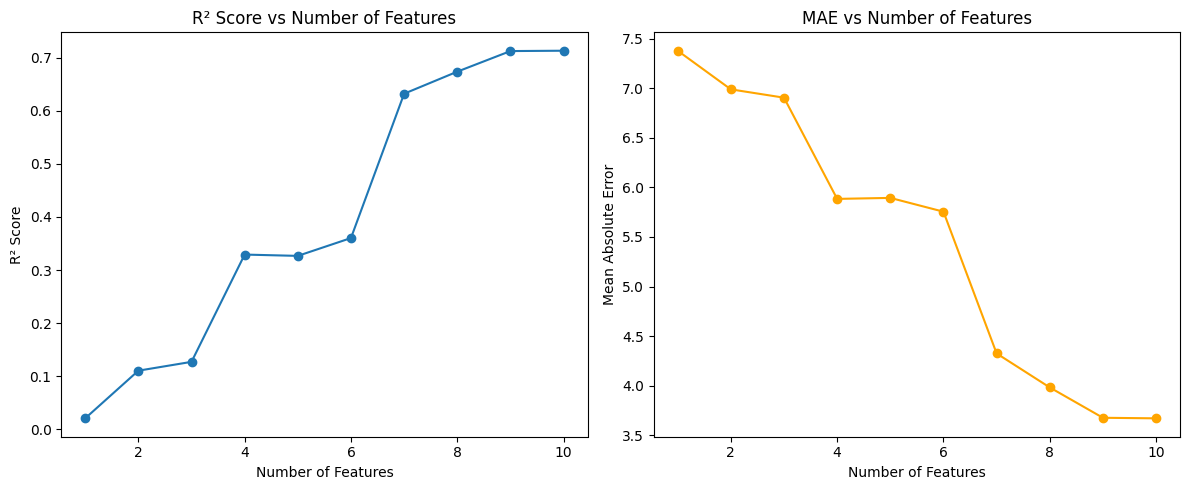

In [120]:
plt.figure(figsize=(12, 5))

# R² Score
plt.subplot(1, 2, 1)
plt.plot(num_features_list, r2_scores, marker='o')
plt.title('R² Score vs Number of Features')
plt.xlabel('Number of Features')
plt.ylabel('R² Score')

# MAE
plt.subplot(1, 2, 2)
plt.plot(num_features_list, mae_scores, marker='o', color='orange')
plt.title('MAE vs Number of Features')
plt.xlabel('Number of Features')
plt.ylabel('Mean Absolute Error')

plt.tight_layout()
plt.show()



In [128]:
best_n = 8


lr = LinearRegression()
rfe = RFE(estimator=lr, n_features_to_select=best_n)
rfe.fit(X_train, y_train)


selected_features = X_train.columns[rfe.support_]
print("Selected Features:", selected_features.tolist())

Selected Features: ['order_protocol', 'total_items', 'num_distinct_items', 'total_busy_dashers', 'total_outstanding_orders', 'distance', 'order_hour', 'isWeekend']


In [130]:
X_train_final = X_train[selected_features]
X_test_final = X_test[selected_features]


lr_final = LinearRegression()
lr_final.fit(X_train_final, y_train)


LinearRegression()

In [132]:
y_pred_final = lr_final.predict(X_test_final)

In [136]:

mae = mean_absolute_error(y_test, y_pred_final)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_final))
r2 = r2_score(y_test, y_pred_final)

print("\nFinal Model Evaluation:")
print(f"Selected Features: {len(selected_features)}")
print(f"MAE  : {mae:.2f} minutes")
print(f"RMSE : {rmse:.2f} minutes")
print(f"R²   : {r2:.4f}")


Final Model Evaluation:
Selected Features: 8
MAE  : 3.98 minutes
RMSE : 5.34 minutes
R²   : 0.6737


## **6. Results and Inference** <font color = red>[5 marks]</font> <br>

#### **6.1 Perform Residual Analysis** <font color = red>[3 marks]</font> <br>

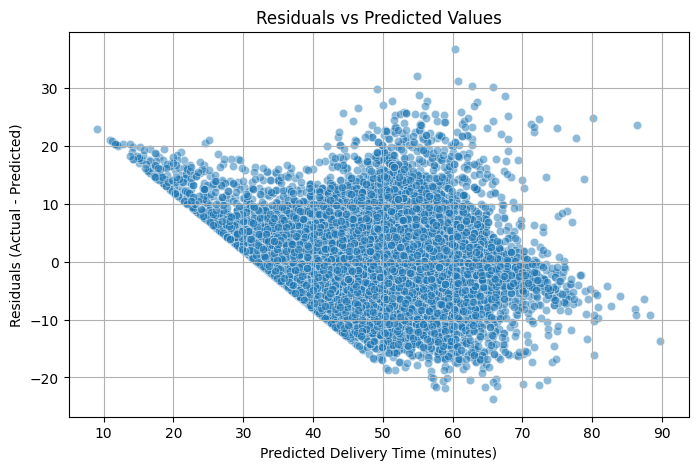

In [140]:
# Perform residual analysis using plots like residuals vs predicted values, Q-Q plot and residual histogram
residuals = y_test - y_pred_final

plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_pred_final, y=residuals, alpha=0.5)
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Delivery Time (minutes)')
plt.ylabel('Residuals (Actual - Predicted)')
plt.grid(True)
plt.show()


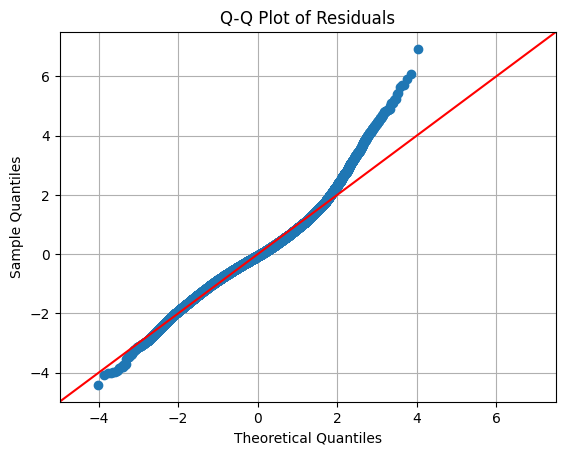

In [142]:
sm.qqplot(residuals, line='45', fit=True)
plt.title('Q-Q Plot of Residuals')
plt.grid(True)
plt.show()

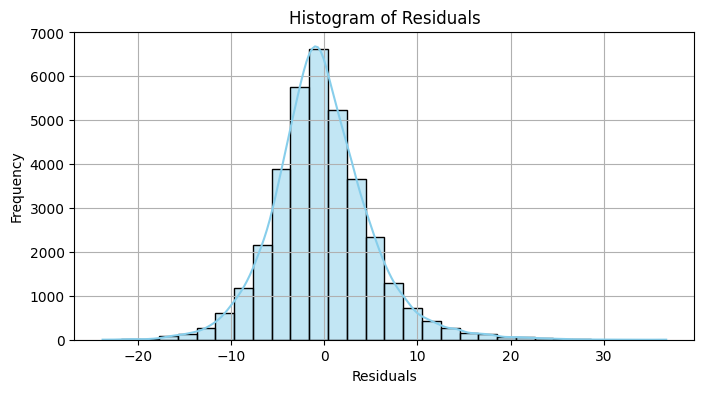

In [144]:
plt.figure(figsize=(8, 4))
sns.histplot(residuals, kde=True, bins=30, color='skyblue')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

[Your inferences here:]
1. This pattern indicates heteroscedasticity, meaning the model's errors are not consistent across all predicted values.
2. Residuals are roughly normally distributed, confirming decent model behavior.


#### **6.2 Perform Coefficient Analysis** <font color = red>[2 marks]</font> <br>

Perform coefficient analysis to find how changes in features affect the target.
Also, the features were scaled, so interpret the scaled and unscaled coefficients to understand the impact of feature changes on delivery time.


Additionally, we can analyse the effect of a unit change in a feature. In other words, because we have scaled the features, a unit change in the features will not translate directly to the model. Use scaled and unscaled coefficients to find how will a unit change in a feature affect the target.

In [ ]:
# Analyze the effect of a unit change in a feature, say 'total_items'



Note:
The coefficients on the original scale might differ greatly in magnitude from the scaled coefficients, but they both describe the same relationships between variables.

Interpretation is key: Focus on the direction and magnitude of the coefficients on the original scale to understand the impact of each variable on the response variable in the original units.

Include conclusions in your report document.

## Subjective Questions <font color = red>[20 marks]</font>

Answer the following questions only in the notebook. Include the visualisations/methodologies/insights/outcomes from all the above steps in your report.

#### Subjective Questions based on Assignment

##### **Question 1.** <font color = red>[2 marks]</font> <br>

Are there any categorical variables in the data? From your analysis of the categorical variables from the dataset, what could you infer about their effect on the dependent variable?

**Answer:**
>Yes, The dataset included categorical variables.
>1. Order_protocol- it shows how the order was placed as coefficients from the model showed a negative impact on delivery time for some protocols.
>2. isWeekend - shows whether the order was placed on weekend as coefficient was strongly positive as delivery on weekends are slower
> The categorical variables significantly affected delivery time



---



##### **Question 2.** <font color = red>[1 marks]</font> <br>
What does `test_size = 0.2` refer to during splitting the data into training and test sets?

**Answer:**
>When using train_test_split from sklearn.model_selection it means the test_size parameter is what fraction of the data should be assigned to the test set.
>20% of the data will be used for testing, 80% of the data will be used for training the model.



---



##### **Question 3.** <font color = red>[1 marks]</font> <br>
Looking at the heatmap, which one has the highest correlation with the target variable?  

**Answer:**
>The feature with the highest positive correlation with delivery time is distance, with a correlation of 0.46.



---



##### **Question 4.** <font color = red>[2 marks]</font> <br>
What was your approach to detect the outliers? How did you address them?

**Answer:**

>we used boxplots to visually inspect the outliers in each numerical features which includes target variable i.e delivery time.
>we used the interquartile range to cap the extreme values..
>it helps in preserve data size while still reducing skew and variance that extreme values introduce



---



##### **Question 5.** <font color = red>[2 marks]</font> <br>
Based on the final model, which are the top 3 features significantly affecting the delivery time?

**Answer:**
>Distance, Total outstanding orders and order hour.



---



#### General Subjective Questions

##### **Question 6.** <font color = red>[3 marks]</font> <br>
Explain the linear regression algorithm in detail

**Answer:**
>Linear regression is a supervised learning algorithm which is used to predict continuous numeric target variable based on one or more input.
> It assumes a linear relationship between the input variables X and output y
>2 equations are there
>1. simple linear and multiple linear regression.
>
> Assume a linear model between features and target, learn the best fit line by minimizing the total prediction error and use OLS to find the best coefficients. calles mean squared error.
>
>Model training
>Input to train the data
>Compute optimal coefficients and use it to make predictions on new data.




---



##### **Question 7.** <font color = red>[2 marks]</font> <br>
Explain the difference between simple linear regression and multiple linear regression

**Answer:**
>Simple linear regression
>It involves only one independent variable and one dependent variable. It models a straight line relationship between the two variables
>
>Multiple linear regression
>involves 2 or more independent variables. It models the relationship between the output and multiple input.



---



##### **Question 8.** <font color = red>[2 marks]</font> <br>
What is the role of the cost function in linear regression, and how is it minimized?

**Answer:**
>In linear regression, the cost function measures how well the model's predictions match the actual data. Calculates total errors between predicted values and the actual values in dataset.
>Role of cost function, it quantifies the performance of the model, helps algorithm learn the best fit line by finding the optimal coefficients.
>
>Cost function is minimized by 2 approach
>1. Analytical method by using OLS
>2. Numerical Optimization by gradient descent




---



##### **Question 9.** <font color = red>[2 marks]</font> <br>
Explain the difference between overfitting and underfitting.



**Answer:**

>Overfitting
>Model learns too much from training data, it memorizes noise and outliers. It performs well on training data but not on test data
>
>Underfitting
>Model is simple to learn the pattern in the data, performs poorly on both training and test data.



---



##### **Question 10.** <font color = red>[3 marks]</font> <br>
How do residual plots help in diagnosing a linear regression model?

**Answer:**
>Residual plots help verify if linear regression assumptions are satisfied.
A good model will have residuals randomly scattered around 0.
>
>1. checking linearity
>2. detecting heteroscdasticity
>3. identifying outliers
>4. checking independence
>5. validating model fit